In [298]:
import pandas as pd

df = pd.read_csv("Outliers.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,0,0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
1,1,1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
2,2,2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
3,3,3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
4,4,4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726


## Basic Data Cleaning


In [299]:
df.drop(columns="Unnamed: 0", inplace= True)
df.drop(columns="Unnamed: 0.1", inplace= True)

In [300]:
df.shape

(20, 10)

In [301]:
df.describe()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,178.811320,76.846041,31.951152,94841.431069,89.467966,44.997247,7.432512,68540.135431,7201.054283,7746.225809
std,18.680035,34.204976,16.566131,213161.392613,27.600501,14.118744,10.139389,219304.682273,10114.241628,21721.054362
min,160.227221,31.705153,21.930511,33698.016530,64.637563,33.261205,2.801198,12543.712036,3455.228903,1888.298424
25%,170.654515,62.859454,25.331309,42831.058613,79.628938,37.514610,3.709065,15759.827698,4281.985251,2439.844560
50%,174.053779,71.505295,27.997961,46644.471532,84.338259,44.271253,5.674664,18659.318577,5052.515200,2947.292713
75%,180.976219,88.140363,31.617898,52336.550170,90.855337,47.886379,6.201034,23561.967247,5847.479885,3330.935613
max,250.000000,200.000000,100.000000,1000000.000000,200.000000,100.000000,50.000000,1000000.000000,50000.000000,100000.000000


In [302]:
df.isna().sum()

Height          0
Weight          0
Age             0
Income          0
Score           0
Hours_Worked    0
Experience      0
Savings         0
Debt            0
Expenditure     0
dtype: int64

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Height        20 non-null     float64
 1   Weight        20 non-null     float64
 2   Age           20 non-null     float64
 3   Income        20 non-null     float64
 4   Score         20 non-null     float64
 5   Hours_Worked  20 non-null     float64
 6   Experience    20 non-null     float64
 7   Savings       20 non-null     float64
 8   Debt          20 non-null     float64
 9   Expenditure   20 non-null     float64
dtypes: float64(10)
memory usage: 1.7 KB


In [304]:
df[df.duplicated()]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure


## Feature Engineering Tasks

### How would you identify the 1st and 99th percentiles for the 'Height' column?

In [305]:
upper_limit = df["Height"].quantile(0.99)
lower_limit = df["Height"].quantile(0.01)
upper_limit , lower_limit

(239.0576970784827, 160.4612672683278)

In [306]:
# identifing outliers
df[(df["Height"]>=239.05)|(df["Height"]<=160.46)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
5,160.227221,48.184515,27.809628,45982.190638,98.958892,100.000000,4.700731,24722.397435,5844.362976,2198.971172


### How would you remove outliers from the 'Height' column based on the 1st and 99th percentiles?

In [307]:
df_height = df[(df["Height"]<=239.05) & (df["Height"]>=160.46)]

In [308]:
df_height.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726
6,179.500884,70.686378,23.736023,33698.016530,91.787796,37.931905,50.000000,15435.888873,3999.784653,2447.808330


### Plot a box plot for the 'Height' column before and after outlier removal.

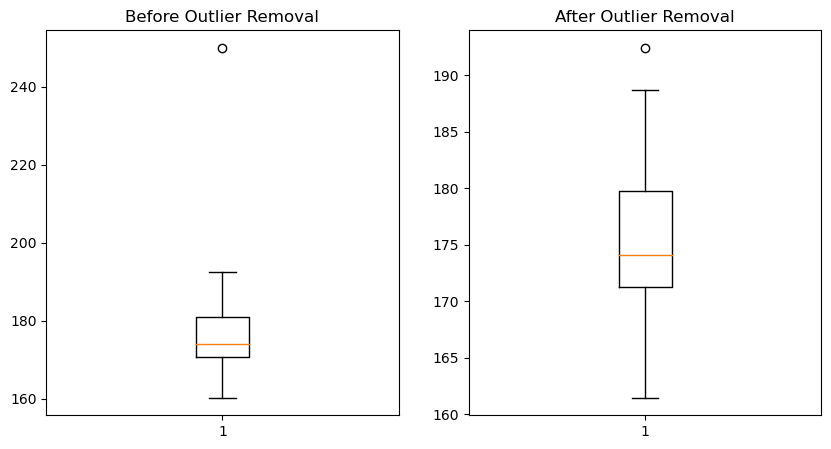

In [309]:
import matplotlib.pyplot as plt
# before removal
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Height"])
plt.title("Before Outlier Removal")
           
# after removal
plt.subplot(1,2,2)
plt.boxplot(df_height["Height"])
plt.title("After Outlier Removal")

plt.show()


### summary statistics (mean, median, std) before and after outlier removal for column 'Height'.

In [310]:
df['Height'].describe()

count     20.000000
mean     178.811320
std       18.680035
min      160.227221
25%      170.654515
50%      174.053779
75%      180.976219
max      250.000000
Name: Height, dtype: float64

In [311]:
 df_height['Height'].describe()

count     18.000000
mean     175.888843
std        7.907545
min      161.459043
25%      171.272672
50%      174.053779
75%      179.715756
max      192.408932
Name: Height, dtype: float64

### Calculate the 5th and 95th percentiles for the 'Weight' column.

In [312]:
upper_limit = df["Weight"].quantile(0.95)
lower_limit = df["Weight"].quantile(0.05)
upper_limit , lower_limit

(108.84400339182346, 39.85890796593348)

In [313]:
df[(df["Weight"]>= 108.84)|(df["Weight"]<=39.85)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353


### Remove outliers from the 'Weight' column that are below the 5th percentile or above the 95th percentile.

In [314]:
df_weight = df[(df["Weight"] <=108.84) & (df["Weight"]>=39.85)]
df_weight.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726
5,160.227221,48.184515,27.809628,45982.190638,98.958892,100.000000,4.700731,24722.397435,5844.362976,2198.971172
6,179.500884,70.686378,23.736023,33698.016530,91.787796,37.931905,50.000000,15435.888873,3999.784653,2447.808330


### Plot a box plot for the 'Weight' column before and after outlier removal.

Text(0.5, 1.0, 'after outlier removal')

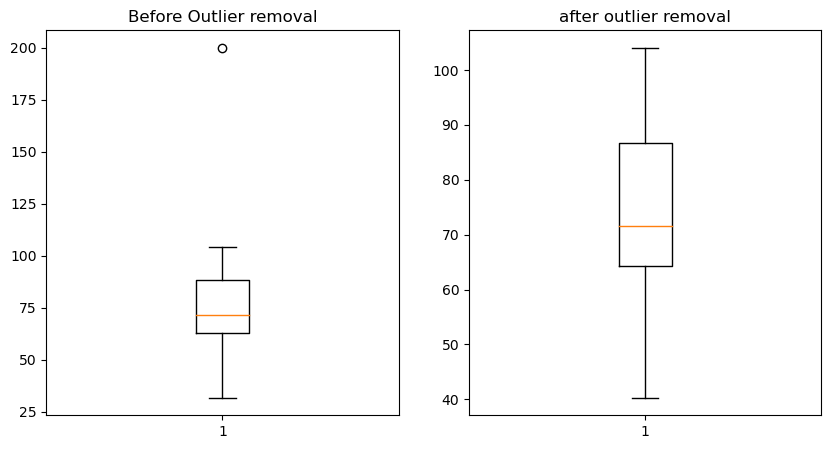

In [315]:
# before removal 

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Weight"])
plt.title("Before Outlier removal")
# after removal oulier

plt.subplot(1,2,2)
plt.boxplot(df_weight["Weight"])
plt.title("after outlier removal")

###  Summary statistics (mean, median, std) before and after outlier removal for column 'Weight'.

In [316]:
df['Weight'].describe()

count     20.000000
mean      76.846041
std       34.204976
min       31.705153
25%       62.859454
50%       71.505295
75%       88.140363
max      200.000000
Name: Weight, dtype: float64

In [317]:
df_weight['Weight'].describe()


count     18.000000
mean      72.511982
std       16.604246
min       40.288053
25%       64.337903
50%       71.505295
75%       86.768409
max      104.046319
Name: Weight, dtype: float64

### Identify the 10th and 90th percentiles for the 'Age' column.

In [318]:
upper_limit = df["Age"].quantile(0.90)
lower_limit = df["Age"].quantile(0.10)
upper_limit , lower_limit

(34.4740942988595, 23.652411911185848)

In [319]:
df[(df["Age"]>=34.47)|(df["Age"]<=23.65)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
8,168.967811,92.991688,21.930511,40927.016356,69.292474,49.614710,6.344590,13420.462947,50000.000000,2630.218502


### Remove outliers from the 'Age' column that are below the 10th percentile or above the 90th percentile.

In [320]:
df_age = df[(df["Age"]<=34.47)& (df["Age"]>=23.65)]
df_age.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726
5,160.227221,48.184515,27.809628,45982.190638,98.958892,100.000000,4.700731,24722.397435,5844.362976,2198.971172
6,179.500884,70.686378,23.736023,33698.016530,91.787796,37.931905,50.000000,15435.888873,3999.784653,2447.808330
7,168.486428,67.192242,33.887452,54627.822555,78.200752,36.262726,8.698527,1000000.000000,3455.228903,3026.082540


### Plot a box plot for the 'Age' column before and after outlier removal.

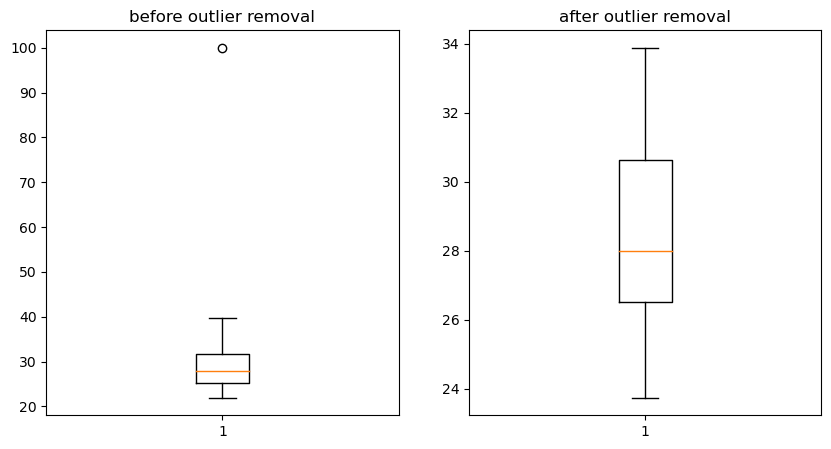

In [321]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Age"])
plt.title("before outlier removal")
# after outlier removal
plt.subplot(1,2,2)
plt.boxplot(df_age["Age"])
plt.title("after outlier removal")
plt.show()

### Summary statistics (mean, median, std) before and after outlier removal for column 'Age'.

In [322]:
df["Age"].describe()

count     20.000000
mean      31.951152
std       16.566131
min       21.930511
25%       25.331309
50%       27.997961
75%       31.617898
max      100.000000
Name: Age, dtype: float64

In [323]:
df_age["Age"].describe()

count    16.000000
mean     28.402422
std       3.043411
min      23.736023
25%      26.501959
50%      27.997961
75%      30.627529
max      33.887452
Name: Age, dtype: float64

### Calculate the 2.5th and 97.5th percentiles for the 'Income' column.

In [324]:
upper_limit = df["Income"].quantile(0.975)
lower_limit = df["Income"].quantile(0.25)
upper_limit , lower_limit

(554162.1532515794, 42831.05861283652)

In [325]:
df[(df["Income"]>=554162.15)|(df["Income"]<=42831.05)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
6,179.500884,70.686378,23.736023,33698.016530,91.787796,37.931905,50.000000,15435.888873,3999.784653,2447.808330
8,168.967811,92.991688,21.930511,40927.016356,69.292474,49.614710,6.344590,13420.462947,50000.000000,2630.218502
13,171.216750,40.288053,24.096839,37651.741796,89.766390,49.550325,5.063661,15867.807307,4348.974407,2415.953251
16,184.940791,88.454360,30.332586,41292.028508,80.105000,44.736260,6.153182,25633.179611,4196.590336,3385.895276


### Remove outliers from the 'Income' column that are below the 2.5th percentile or above the 97.5th percentile.

In [326]:
df_income = df[(df["Income"]<=554162.15)&(df["Income"]>=42831.05)]
df_income.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726
5,160.227221,48.184515,27.809628,45982.190638,98.958892,100.000000,4.700731,24722.397435,5844.362976,2198.971172
7,168.486428,67.192242,33.887452,54627.822555,78.200752,36.262726,8.698527,1000000.000000,3455.228903,3026.082540


### Plot a box plot for the 'Income' column before and after outlier removal.

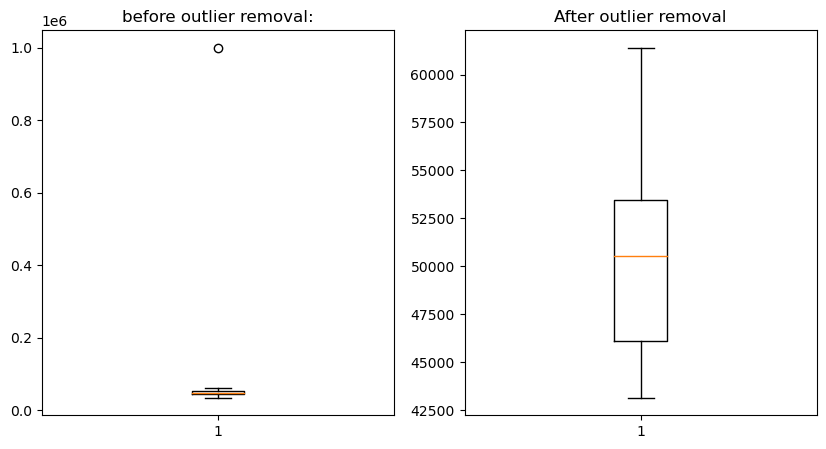

In [327]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Income"])
plt.title("before outlier removal:")
# after outlier removal

plt.subplot(1,2,2)
plt.boxplot(df_income["Income"])
plt.title("After outlier removal")

plt.show()

 ### Summary statistics (mean, median, std) before and after outlier removal for column 'Income'.

In [328]:
df["Income"].describe()

count         20.000000
mean       94841.431069
std       213161.392613
min        33698.016530
25%        42831.058613
50%        46644.471532
75%        52336.550170
max      1000000.000000
Name: Income, dtype: float64

In [329]:
df_income["Income"].describe()

count       14.000000
mean     50099.377215
std       5478.943109
min      43151.899091
25%      46087.760075
50%      50540.553690
75%      53461.127664
max      61394.006845
Name: Income, dtype: float64

### Identify the 25th and 75th percentiles for the 'Score' column.

In [330]:
upper_limit = df["Score"].quantile(0.75)
lower_limit = df["Score"].quantile(0.25)
upper_limit , lower_limit

(90.85533687988264, 79.62893806587527)

In [331]:
df[(df["Score"]>=90.85)|(df["Score"]<=79.62)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726
5,160.227221,48.184515,27.809628,45982.190638,98.958892,100.000000,4.700731,24722.397435,5844.362976,2198.971172
6,179.500884,70.686378,23.736023,33698.016530,91.787796,37.931905,50.000000,15435.888873,3999.784653,2447.808330
7,168.486428,67.192242,33.887452,54627.822555,78.200752,36.262726,8.698527,1000000.000000,3455.228903,3026.082540
8,168.967811,92.991688,21.930511,40927.016356,69.292474,49.614710,6.344590,13420.462947,50000.000000,2630.218502
10,171.440436,72.324211,25.522667,57290.905622,75.968231,49.337795,3.460168,19658.791973,5920.858824,2353.571545
11,184.542735,75.672438,31.934512,51289.829108,92.224451,44.530223,6.078498,28566.713608,5318.727653,3133.525435
17,167.948417,88.035698,31.512359,44211.503352,97.858705,39.224950,4.583402,14600.342458,4310.450222,3411.752077


### Remove outliers from the 'Score' column that are below the 25th percentile or above the 75th percentile.

In [332]:
df_score = df[(df["Score"]<=90.85)&(df["Score"]>=79.62)]
df_score.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
9,174.105985,92.040382,28.936299,50519.453958,90.544517,47.402574,5.814924,17692.076976,5316.942612,100000.000000
12,177.610377,56.683214,27.445974,61394.006845,82.082750,35.693872,3.651335,16276.225890,5856.830612,2980.358591
13,171.216750,40.288053,24.096839,37651.741796,89.766390,49.550325,5.063661,15867.807307,4348.974407,2415.953251


### Plot a box plot for the 'Score' column before and after outlier removal.

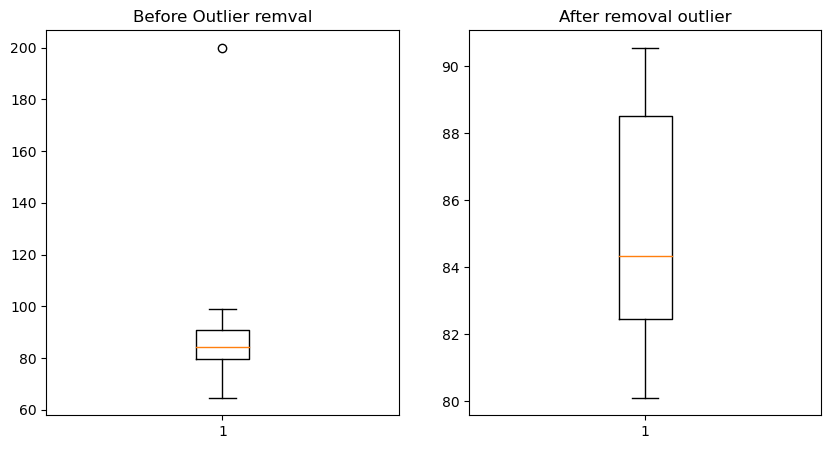

In [333]:
# before removal outlier
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Score"])
plt.title("Before Outlier remval")
 
# after outlier removal

plt.subplot(1,2,2)
plt.boxplot(df_score["Score"])
plt.title("After removal outlier")

plt.show()

### Summary statistics (mean, median, std) before and after outlier removal for column 'Score'.¶

In [334]:
# before outlier removal
df["Score"].describe()

count     20.000000
mean      89.467966
std       27.600501
min       64.637563
25%       79.628938
50%       84.338259
75%       90.855337
max      200.000000
Name: Score, dtype: float64

In [335]:
# after outlier removal
df_score["Score"].describe()

count    10.000000
mean     85.208196
std       3.695230
min      80.105000
25%      82.452978
50%      84.338259
75%      88.522632
max      90.544517
Name: Score, dtype: float64

### Calculate the 15th and 85th percentiles for the 'Hours_Worked' column.

In [336]:
upper_limit = df["Hours_Worked"].quantile(0.85)
lower_limit = df["Hours_Worked"].quantile(0.15)
upper_limit , lower_limit

(49.43593917731336, 35.45994828468189)

In [337]:
df[(df["Hours_Worked"]>=49.43)|(df["Hours_Worked"] <=35.45)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726
5,160.227221,48.184515,27.809628,45982.190638,98.958892,100.000000,4.700731,24722.397435,5844.362976,2198.971172
8,168.967811,92.991688,21.930511,40927.016356,69.292474,49.614710,6.344590,13420.462947,50000.000000,2630.218502
13,171.216750,40.288053,24.096839,37651.741796,89.766390,49.550325,5.063661,15867.807307,4348.974407,2415.953251


### Remove outliers from the 'Hours_Worked' column that are below the 15th percentile or above the 85th percentile.

In [338]:
df_hours_worked = df[(df["Hours_Worked"]<=49.43)&(df["Hours_Worked"]>=35.45)]
df_hours_worked.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
6,179.500884,70.686378,23.736023,33698.016530,91.787796,37.931905,50.000000,15435.888873,3999.784653,2447.808330
7,168.486428,67.192242,33.887452,54627.822555,78.200752,36.262726,8.698527,1000000.000000,3455.228903,3026.082540
9,174.105985,92.040382,28.936299,50519.453958,90.544517,47.402574,5.814924,17692.076976,5316.942612,100000.000000


### Plot a box plot for the 'Hour_worked' column before and after outlier removal.

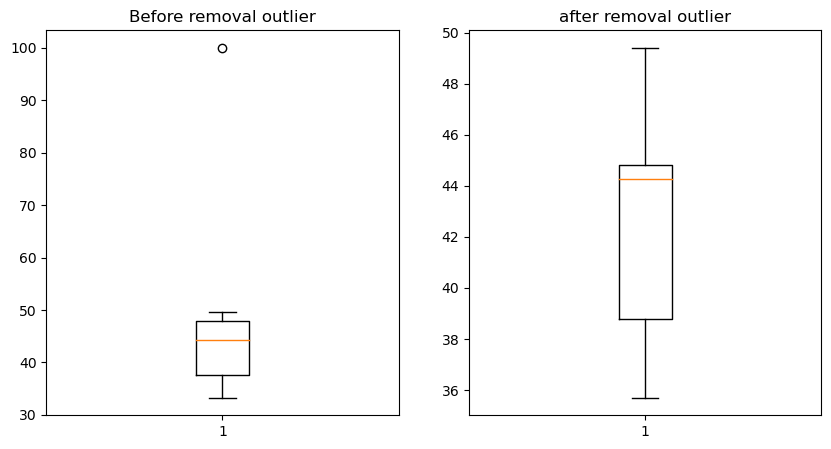

In [339]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Hours_Worked"])
plt.title("Before removal outlier")

# after removal outlier
plt.subplot(1,2,2)
plt.boxplot(df_hours_worked["Hours_Worked"])
plt.title("after removal outlier")
plt.show()

### Summary statistics (mean, median, std) before and after outlier removal for column 'Hour_worked'.¶¶

In [340]:
# before removal outlier
df["Hours_Worked"].describe()

count     20.000000
mean      44.997247
std       14.118744
min       33.261205
25%       37.514610
50%       44.271253
75%       47.886379
max      100.000000
Name: Hours_Worked, dtype: float64

In [341]:
# after removal outlier
df_hours_worked["Hours_Worked"].describe()

count    14.000000
mean     42.838338
std       4.559704
min      35.693872
25%      38.801225
50%      44.271253
75%      44.819303
max      49.415753
Name: Hours_Worked, dtype: float64

### Identify the 20th and 80th percentiles for the 'Experience' column.

In [342]:
upper_limit = df["Experience"].quantile(0.80)
lower_limit = df["Experience"].quantile(0.20)
upper_limit , lower_limit

(6.346244929198496, 3.6432405990556522)

In [343]:
df[(df["Experience"]>=6.34)|(df["Experience"]<=3.64)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726
6,179.500884,70.686378,23.736023,33698.016530,91.787796,37.931905,50.000000,15435.888873,3999.784653,2447.808330
7,168.486428,67.192242,33.887452,54627.822555,78.200752,36.262726,8.698527,1000000.000000,3455.228903,3026.082540
8,168.967811,92.991688,21.930511,40927.016356,69.292474,49.614710,6.344590,13420.462947,50000.000000,2630.218502
10,171.440436,72.324211,25.522667,57290.905622,75.968231,49.337795,3.460168,19658.791973,5920.858824,2353.571545
15,173.336743,72.345235,32.141659,43151.899091,87.065732,44.012282,6.352867,16682.608568,5681.594518,2914.226834
19,161.459043,65.465459,28.186294,50561.653422,84.019894,44.611033,2.813877,17810.899776,5017.479159,3668.263975


### Remove outliers from the 'Experience' column that are below the 20th percentile or above the 80th percentile.

In [344]:
df_exp = df[(df["Experience"]<=6.34)&(df["Experience"]>=3.64)]
df_exp.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
5,160.227221,48.184515,27.809628,45982.190638,98.958892,100.000000,4.700731,24722.397435,5844.362976,2198.971172
9,174.105985,92.040382,28.936299,50519.453958,90.544517,47.402574,5.814924,17692.076976,5316.942612,100000.000000
11,184.542735,75.672438,31.934512,51289.829108,92.224451,44.530223,6.078498,28566.713608,5318.727653,3133.525435


### Plot a box plot for the 'Hour_worked' column before and after outlier removal.¶

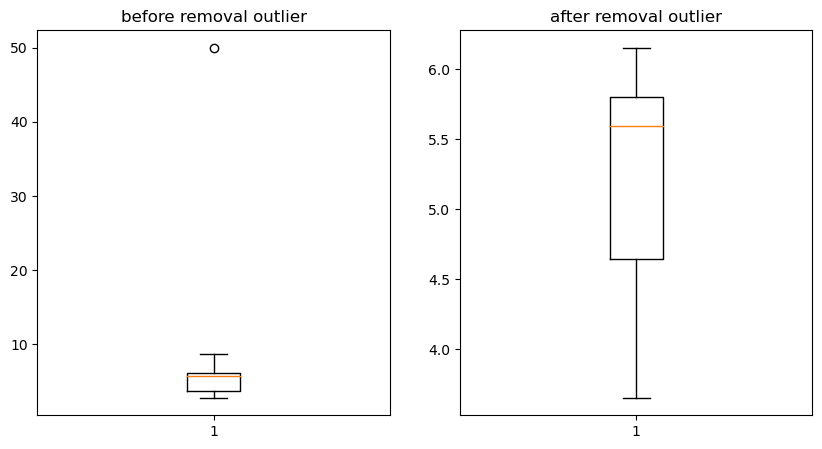

In [345]:
#before outlier removal

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Experience"])
plt.title("before removal outlier")

# after removal outlier
plt.subplot(1,2,2)
plt.boxplot(df_exp["Experience"])
plt.title("after removal outlier")

plt.show()
            

 ### Summary statistics (mean, median, std) before and after outlier removal for column 'Experience'.

In [346]:
df["Experience"].describe()

count    20.000000
mean      7.432512
std      10.139389
min       2.801198
25%       3.709065
50%       5.674664
75%       6.201034
max      50.000000
Name: Experience, dtype: float64

In [347]:
df_exp["Experience"].describe()

count    11.000000
mean      5.174126
std       0.898704
min       3.651335
25%       4.642067
50%       5.596476
75%       5.803469
max       6.153182
Name: Experience, dtype: float64

### Calculate the 1st and 99th percentiles for the 'Savings' column and identify outliers.

In [348]:
upper_limit = df["Savings"].quantile(0.99)
lower_limit = df["Savings"].quantile(0.01)
upper_limit , lower_limit

(816063.9875361195, 12710.294709556352)

In [349]:
df[(df["Savings"]>=816063.98)|(df["Savings"]<=12710.29)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
7,168.486428,67.192242,33.887452,54627.822555,78.200752,36.262726,8.698527,1000000.000000,3455.228903,3026.082540


### Remove outliers from the 'Savings' column based on the 1st and 99th percentiles.

In [350]:
df_saving = df[(df["Savings"]<=816063.98)&(df["Savings"]>=12710.29)]
df_saving.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726
5,160.227221,48.184515,27.809628,45982.190638,98.958892,100.000000,4.700731,24722.397435,5844.362976,2198.971172


### Plot a box plot for the 'Savings' column before and after outlier removal.¶¶

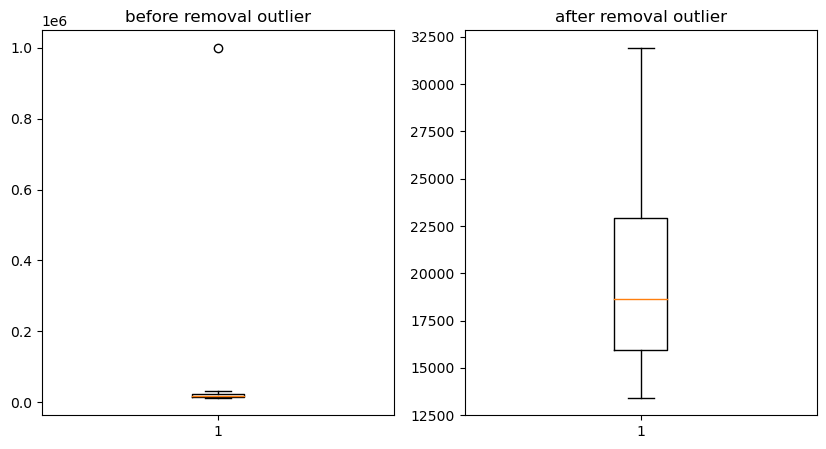

In [351]:
# before removing 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Savings"])
plt.title("before removal outlier")

# after removal outlier
plt.subplot(1,2,2)
plt.boxplot(df_saving["Savings"])
plt.title("after removal outlier")
plt.show()

### Summary statistics (mean, median, std) before and after outlier removal for column 'Savings'.¶

In [352]:
df["Savings"].describe()

count         20.000000
mean       68540.135431
std       219304.682273
min        12543.712036
25%        15759.827698
50%        18659.318577
75%        23561.967247
max      1000000.000000
Name: Savings, dtype: float64

In [353]:
df_saving["Savings"].describe()

count       18.000000
mean     19903.277588
std       5221.336329
min      13420.462947
25%      15969.911952
50%      18659.318577
75%      22930.607515
max      31915.723874
Name: Savings, dtype: float64

### Identify the 5th and 95th percentiles for the 'Debt' column and find outliers.

In [354]:
upper_limit = df["Debt"].quantile(0.95)
lower_limit = df["Debt"].quantile(0.05)
upper_limit , lower_limit

(9083.055451126167, 3758.59770227246)

In [355]:
df[(df["Debt"]>=9083.05)|(df["Debt"]<=3758.59)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
7,168.486428,67.192242,33.887452,54627.822555,78.200752,36.262726,8.698527,1000000.000000,3455.228903,3026.082540
8,168.967811,92.991688,21.930511,40927.016356,69.292474,49.614710,6.344590,13420.462947,50000.000000,2630.218502


### Remove outliers from the 'Debt' column using the 5th and 95th percentiles.

In [356]:
df_debt = df[(df["Debt"]<=9083.05)&(df["Debt"]>=3758.59)]
df_debt.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726


### Plot a box plot for the 'Debt' column before and after outlier removal.¶¶¶

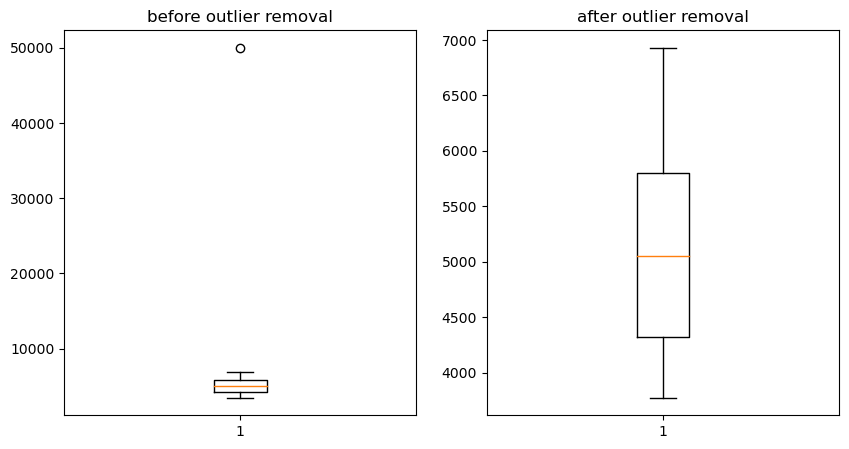

In [357]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Debt"])
plt.title("before outlier removal")

# after outlier removal
plt.subplot(1,2,2)
plt.boxplot(df_debt["Debt"])
plt.title("after outlier removal")

plt.show()

### Summary statistics (mean, median, std) before and after outlier removal for column 'Debt'.¶

In [358]:
df["Debt"].describe()

count       20.000000
mean      7201.054283
std      10114.241628
min       3455.228903
25%       4281.985251
50%       5052.515200
75%       5847.479885
max      50000.000000
Name: Debt, dtype: float64

In [359]:
df_debt["Debt"].describe()

count      18.000000
mean     5031.436487
std       879.454485
min      3774.564481
25%      4320.081268
50%      5052.515200
75%      5803.670862
max      6929.532054
Name: Debt, dtype: float64

### Calculate the 10th and 90th percentiles for the 'Expenditure' column and determine outliers.

In [360]:
upper_limit = df["Expenditure"].quantile(0.90)
lower_limit = df["Expenditure"].quantile(0.10)
upper_limit , lower_limit

(3709.5993747104117, 2301.169035181554)

In [361]:
df[(df["Expenditure"]>=3709.59)|(df["Expenditure"]<=2301.16)]

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
3,192.408932,58.867525,39.753877,1000000.000000,64.637563,44.846984,7.652772,23175.157184,5087.551241,1888.298424
5,160.227221,48.184515,27.809628,45982.190638,98.958892,100.000000,4.700731,24722.397435,5844.362976,2198.971172
9,174.105985,92.040382,28.936299,50519.453958,90.544517,47.402574,5.814924,17692.076976,5316.942612,100000.000000
18,173.130677,64.190098,26.828390,46884.474679,81.269121,43.070397,5.792013,14262.656738,4544.467496,4081.617975


### Remove outliers from the 'Expenditure' column based on the 10th and 90th percentiles.

In [362]:
df_expen = df[(df["Expenditure"]<=3709.59)&(df["Expenditure"]>=2301.16)]
df_expen.head()

,Height,Weight,Age,Income,Score,Hours_Worked,Experience,Savings,Debt,Expenditure
0,250.000000,31.705153,24.757235,43275.395522,68.348502,49.415753,5.752851,12543.712036,4501.967549,2823.003044
1,174.001572,200.000000,22.899910,46404.468385,89.008265,33.261205,2.801198,22196.958506,6929.532054,2312.524353
2,179.787380,82.966543,100.000000,41868.537180,84.656624,33.647575,5.596476,20833.367477,5949.420807,2678.190799
4,188.675580,104.046319,27.451739,51774.261423,200.000000,34.134383,3.610864,31915.723874,3774.564481,3312.615726
6,179.500884,70.686378,23.736023,33698.016530,91.787796,37.931905,50.000000,15435.888873,3999.784653,2447.808330


### Plot a box plot for the 'Expenditure' column before and after outlier removal.¶¶¶

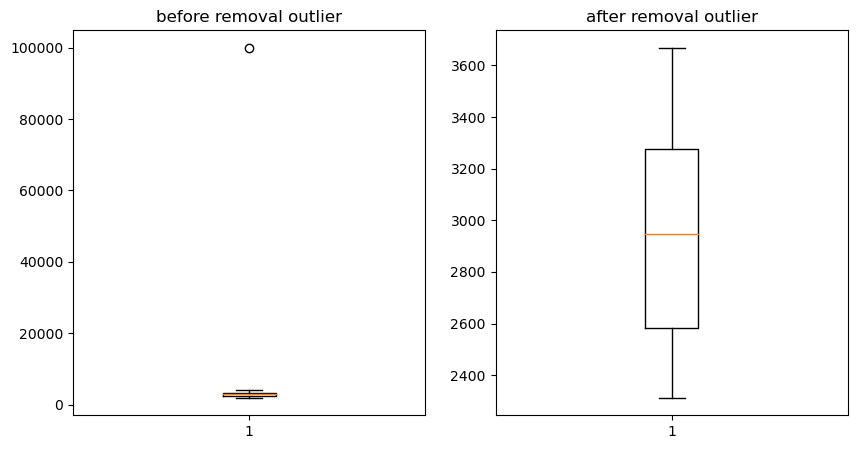

In [363]:
# before removal outlier
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Expenditure"])
plt.title("before removal outlier")
          
# after removal outlier

plt.subplot(1,2,2)
plt.boxplot(df_expen["Expenditure"])
plt.title("after removal outlier")
          
plt.show()

### Summary statistics (mean, median, std) before and after outlier removal for column 'Expenditure'.¶¶

In [364]:
# before removal outlier
df["Expenditure"].describe()

count        20.000000
mean       7746.225809
std       21721.054362
min        1888.298424
25%        2439.844560
50%        2947.292713
75%        3330.935613
max      100000.000000
Name: Expenditure, dtype: float64

In [365]:
# after removal outlier
df_expen["Expenditure"].describe()

count      16.000000
mean     2922.226788
std       421.808367
min      2312.524353
25%      2584.615959
50%      2947.292713
75%      3274.382679
max      3668.263975
Name: Expenditure, dtype: float64